  **SULEIMAN ABUBAKAR's** Project

(1) **Title of the Project:** Machine Learning for Jewelry Price Optimization

This task will delve in to jewelry data from Gemineye Emporium and pridict the future prices in order for the company to improve independantly.

(2) **Methodology**
Throughout the project, CRISP-DM(Cross Industries Standard Process for Data Mining methodology will be use.

(3) **Techniques**
The project will use Python tools and techniques such as Pandas, NumPy, Seaborn and Matplotlib for easy determination of the price.

  **PROJECT Predicting Jewelry Prices at Gemineye Emporium**
  
  The goal is to use ML to predict jewelry prices, optimizing market competitiveness without relying on expensive genologists.
  The objective is to train ML models using data on jewelry prices, including: Target gender, Metal type, Gemstone and other relevant features. with this, Gemineye Emporium will be able to stay competitive in the jewelry market.


**The Data Understanding** via Exploratory Data Analysis (EDA) will help us extract insights, understand the data's potential, and prepare it for modeling. Through EDA processes, we will answer the questions, test hypotheses and uncover new areas to explore, ultimately informing our aproach to predicting jewelry prices.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


In [ ]:
# import the dataset
data = pd.read_csv("/content/Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quality",
    "Category_ID",
    "Category",
    "Brand_ID",
    "USD_Price",
    "User_ID",
    "Target_Gender",
    "Main_Colour",
    "Main_Metal",
    "Main_Gem"
    ]

In [ ]:
data.head(n = 5)

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [ ]:
# Check for missing value
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quality           0
Category_ID        5352
Category           9933
Brand_ID           4785
USD_Price          5352
User_ID            5352
Target_Gender     48167
Main_Colour        7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [ ]:
# How much data
data.shape

(95910, 13)

In [ ]:
# Feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quality           1
Category_ID          25
Category            218
Brand_ID           2537
USD_Price          3166
User_ID           31079
Target_Gender         2
Main_Colour           5
Main_Metal            3
Main_Gem             30
dtype: int64

In [ ]:
# Describe data
data.describe(include="all")

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
count,95910,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,85977,9.112500e+04,90558.000000,9.055800e+04,47743,88250,90448,61852
unique,74504,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,2,5,3,30
top,2020-10-17 12:58:28 UTC,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,26,NaN,NaN,NaN,NaN,29051,NaN,NaN,NaN,47379,69510,89081,29609
mean,NaN,2.485191e+18,1.815970e+18,1.0,1.805947e+18,NaN,8.891036e+16,362.213017,1.512644e+18,NaN,NaN,NaN,NaN
std,NaN,1.934750e+17,2.136814e+17,0.0,2.083954e+16,NaN,3.559651e+17,444.157665,2.374776e+16,NaN,NaN,NaN,NaN
min,NaN,1.924899e+18,1.313551e+18,1.0,1.313678e+18,NaN,0.000000e+00,0.990000,1.313554e+18,NaN,NaN,NaN,NaN
25%,NaN,2.379732e+18,1.515966e+18,1.0,1.806829e+18,NaN,0.000000e+00,145.620000,1.515916e+18,NaN,NaN,NaN,NaN
50%,NaN,2.524282e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,258.770000,1.515916e+18,NaN,NaN,NaN,NaN
75%,NaN,2.644347e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000e+00,431.370000,1.515916e+18,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quality     95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   USD_Price       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Colour     88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [ ]:
# Check for duplicate values
num_duplicated = len(data.loc[data.duplicated()])

In [ ]:
print("Number of duplicated records:", num_duplicated)

Number of duplicated records: 2589


In [ ]:
# Features with a cardinality of 1 (invariant deafures)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [ ]:
invariant_features

['SKU_Quality']

In [ ]:
# Check for label distribution(Prices)
data["USD_Price"].skew()

18.95906072625981

In [ ]:
# Check for the kurtosis
data["USD_Price"].kurtosis()

1054.8979068506155

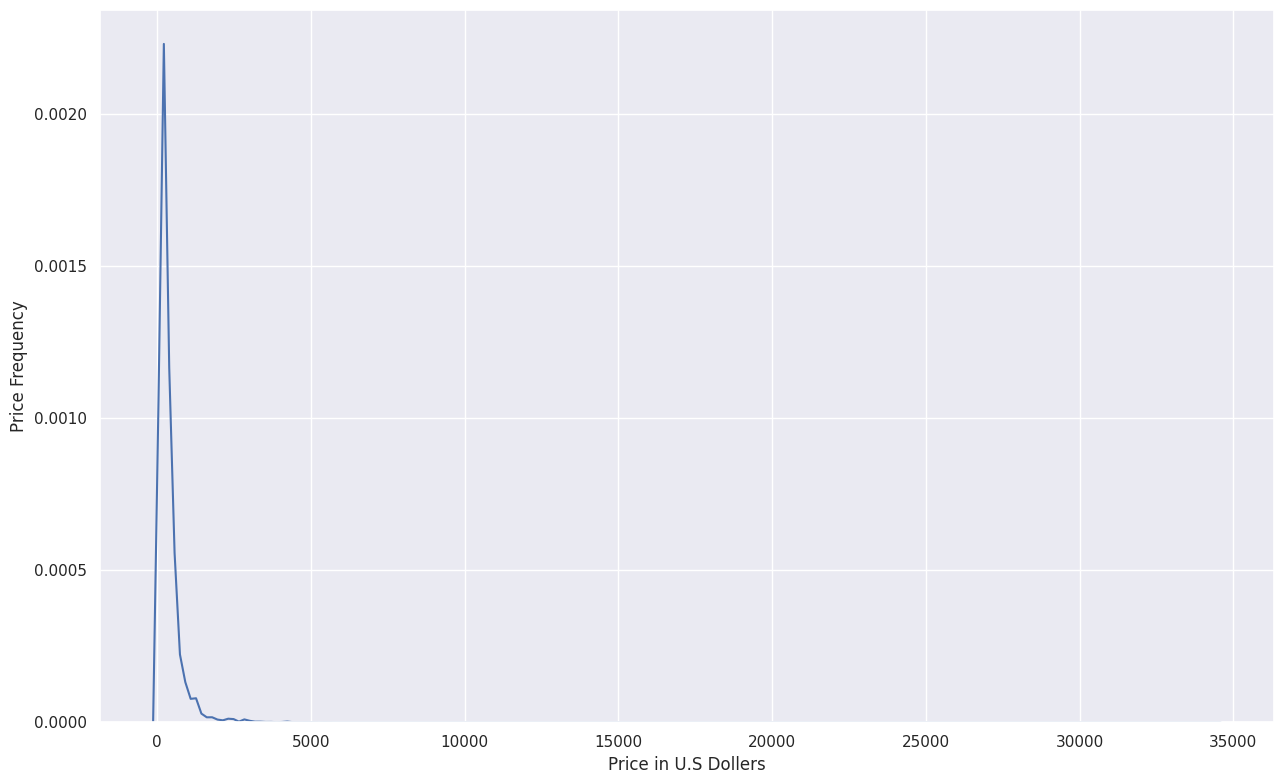

(None, None)

In [ ]:
# visualize the price distribution
plt.figure(figsize = (13, 8))

sns.kdeplot(data = data, x = "USD_Price")

plt.xlabel("Price in U.S Dollers")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(), plt.close()

In [ ]:
# Target Gender Analysis
data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [ ]:
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

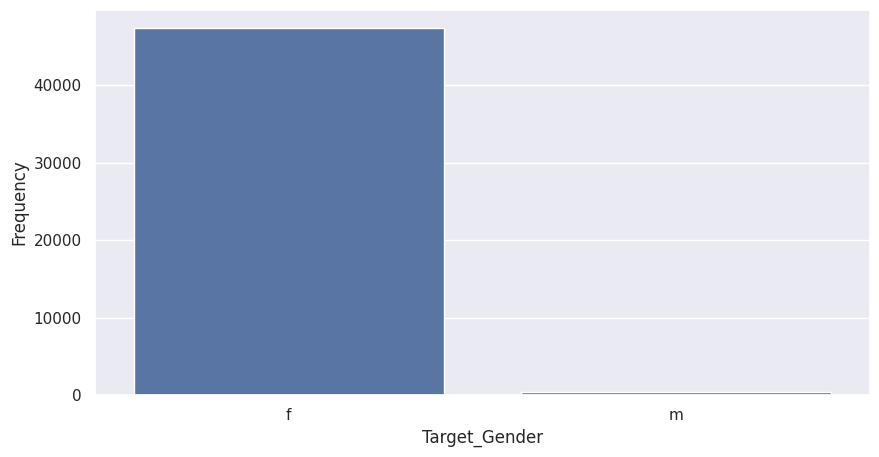

(None, None)

In [ ]:
# visialize target gender
plt.figure(figsize = (10, 5))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Target_Gender")
plt.ylabel("Frequency")

plt.show(), plt.close()

In [ ]:
# Jewelry Category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [ ]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [ ]:
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [ ]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [ ]:
# Pick out automatic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [ ]:
# Percentage of missing values
100 * data.isnull().sum()/ len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quality        0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
USD_Price          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Colour        7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [ ]:
# Percentage of missing values
100 * real_categories.isnull().sum()/ len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quality        0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
USD_Price          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Colour        2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

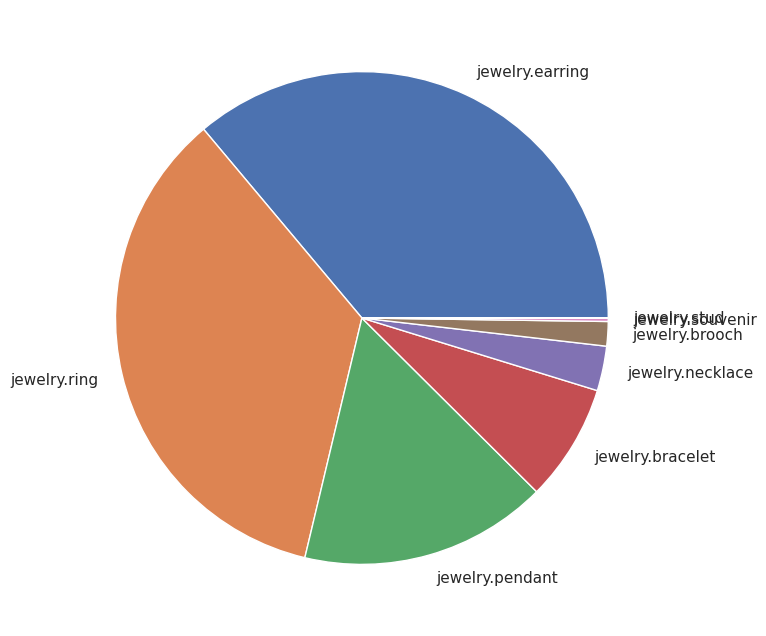

(None, None)

In [ ]:
# Visualize the Jewelry Categories
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (12, 8))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(), plt.close()

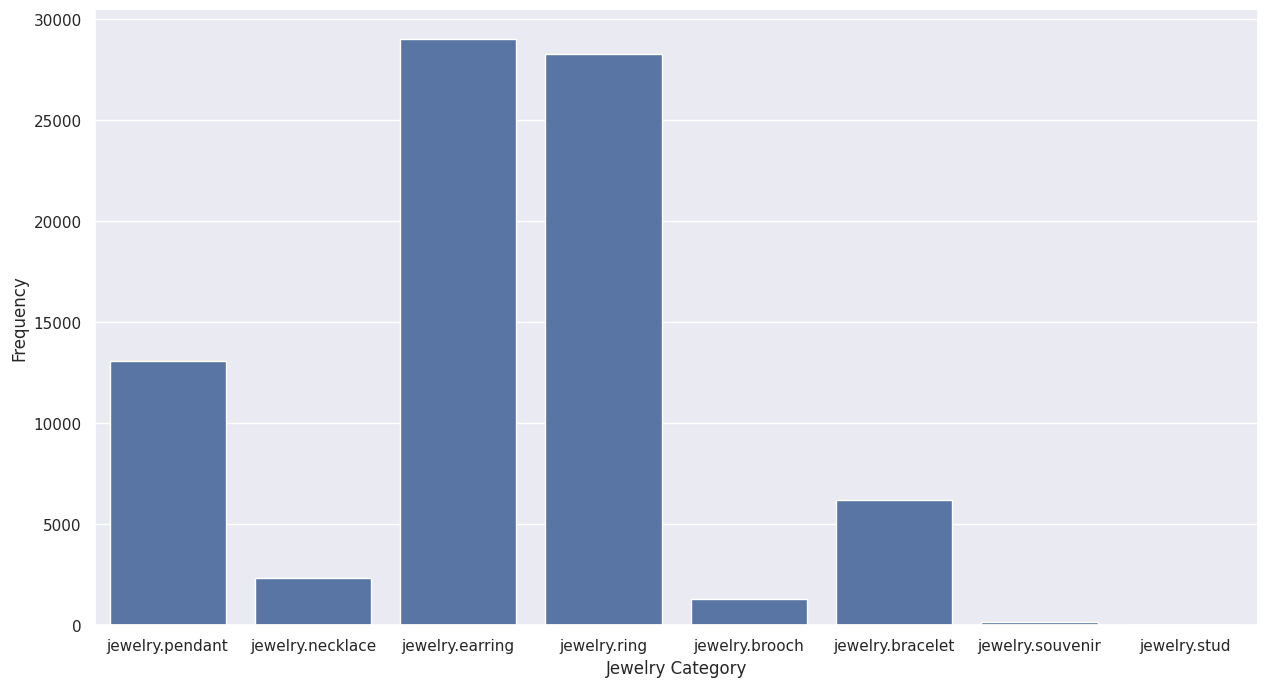

(None, None)

In [ ]:
# Category cout plot
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry Category")
plt.ylabel("Frequency")

plt.show(), plt.close()

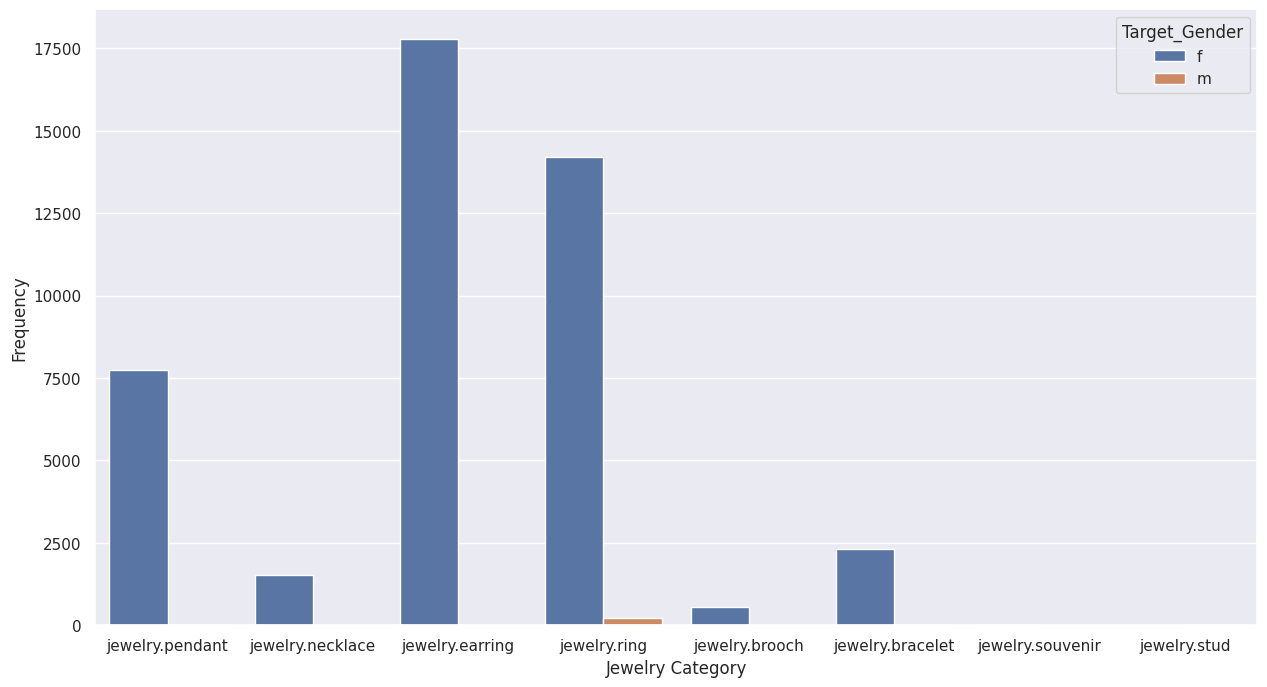

(None, None)

In [ ]:
# Jewelry category by gender
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel("Jewelry Category")
plt.ylabel("Frequency")

plt.show(), plt.close()

In [ ]:
# Gender skew in original data
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [ ]:
real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [ ]:
# Encode Jewelry Categories
encoded, category_codes = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [ ]:
# Encode Gems
encoded, categories_codes = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [ ]:
# Encode Gender
encoded, categories_codes = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [ ]:
# Encode colour
encoded, categories_codes = pd.factorize(real_categories["Main_Colour"])
real_categories.loc[:, "Main_Colour"] = encoded

In [ ]:
# Encode Metal
encoded, categories_codes = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [ ]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quality,Category_ID,Category,Brand_ID,USD_Price,User_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [ ]:
# Feature correlation
correlations = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Product_ID"], axis = 1). corr(method = "spearman")

In [ ]:
correlations

,Order_ID,SKU_Quality,Category_ID,Category,Brand_ID,USD_Price,Target_Gender,Main_Colour,Main_Metal,Main_Gem
Order_ID,1.000000,NaN,0.009364,-0.024714,0.004214,0.055031,-0.010814,0.018447,-0.038268,0.004135
SKU_Quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,0.009364,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,-0.024714,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,0.004214,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
USD_Price,0.055031,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,-0.010814,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Colour,0.018447,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,-0.038268,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,0.004135,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


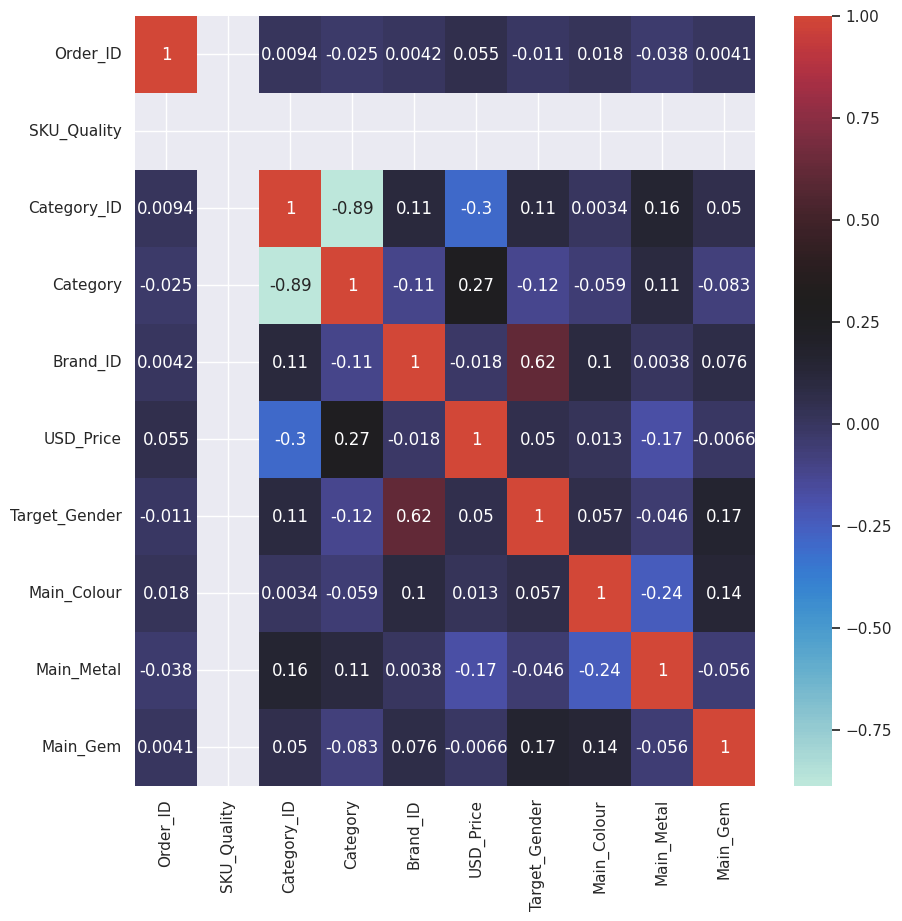

(None, None)

In [ ]:
# Correlation heatmap
plt.figure(figsize = (10, 10))

sns.heatmap(correlations, annot = correlations, center = .3)

plt.show(), plt.close()

In [ ]:
# Set Correlation Limits
upper = 1
lower = 0.2

In [ ]:
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [ ]:
correlated_columns

{'Order_ID': [],
 'SKU_Quality': [],
 'Category_ID': [],
 'Category': ['USD_Price'],
 'Brand_ID': ['Target_Gender'],
 'USD_Price': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Colour': [],
 'Main_Metal': [],
 'Main_Gem': []}

**Correlation Analysis** reveals that ID-based features have no correlation with the target variable. While on the other hand, categorical features have a weak correlation, symbolizing some connectionn to target variable. USD_Price shows a perfect correlation which is the main target variable.

**Based on the findings** Missing values and outliers need addressing through imputation or encoding. The data corruption and rare values exist, but may reflect true distributions. Also, non correlation features of ID's categories did not provide new information.
 The Target variable skewness shows that there is perfect correlation and the feature exhibit low multicolliniearity, ensuring independence.

**Data Preparation Step**
Based on the abovbe findings, we can press ahead to prepare our
missing values using SimpleImputer, Categorical Feature encoding, Redundant feature removal(Order and some ID's categories), Target skew using TransDormedTargetRegressor and mostly, using Sci-kit learn's Pipeline class for efficient chaining of transformers and estimators

In [ ]:
# Columns to eliminate
columns_to_eliminate = [
    "SKU_Quality",
    "Order_ID",
    "Product_ID",
    "User_ID",
    "Category_ID"
]

In [ ]:
data.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'SKU_Quality',
       'Category_ID', 'Category', 'Brand_ID', 'USD_Price', 'User_ID',
       'Target_Gender', 'Main_Colour', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [ ]:
# Eliminate unsued features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [ ]:
data.drop(labels = ["Order_Datetime"], axis = 1, inplace = True)

In [ ]:
data.shape

(95910, 7)

In [ ]:
data.head()

,Category,Brand_ID,USD_Price,Target_Gender,Main_Colour,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [ ]:
# To eliminate the wrong categories
data = data.loc[data["Category"].isin(categories), :]

In [ ]:
data.shape

(80458, 7)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Seperate from labels
X, y = data.drop(labels = ["USD_Price"], axis = 1), data["USD_Price"]

In [ ]:
# Create test and train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1)

In [ ]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
16924,jewelry.ring,0.0,f,red,gold,emerald
65738,jewelry.necklace,1.0,f,red,gold,pearl
8517,jewelry.earring,0.0,NaN,red,gold,diamond
51089,jewelry.pendant,0.0,f,red,gold,NaN
45849,jewelry.ring,0.0,NaN,red,gold,diamond


In [ ]:
y_train.head()

16924    643.70
65738    232.74
8517     266.99
51089     25.89
45849    486.16
Name: USD_Price, dtype: float64

**Data Modelling**


1. Linear Regression
2. Extremely Random Forest (Extra Test)
3. Adaptive Boosting (AdaBoost)
4. catboost

This would be done after successful:
Encode categorical features
Account for target skew
Fix missing values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

In [ ]:
!pip install catboost==1.2

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def generate_pipline(model, column_indicies, categorical_indicies, fill_missing = True, one_hot = True, label_encode = False):
  # Fix missing values
  first_transformer = ColumnTransformer(
      transformers = [
          ("imputer", SimpleImputer(strategy="most_frequent"), column_indicies)
      ],
      remainder="passthrough",
      sparse_threshold=0.
  )

  # One hot encode
  second_transformer = ColumnTransformer(
      transformers = [
          ("one_hot", OneHotEncoder(), categorical_indicies)
      ],
      remainder="passthrough",
      sparse_threshold=0.
  )

  # Label encode
  third_transformer = ColumnTransformer(
      transformers = [
          ("ordinal", OrdinalEncoder(), categorical_indicies)
      ],
      remainder="passthrough",
      sparse_threshold=0.
  )

  steps = []

  if fill_missing:
    steps.append(("first", first_transformer))

  if one_hot:
    steps.append(("second", second_transformer))

  if label_encode:
    steps.append(("third", third_transformer))

  steps.append(("model", model))

  model_pipe = Pipeline(steps = steps)

  return model_pipe

In [ ]:
X.head()

,Category,Brand_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [ ]:
X = X.iloc[:, [i for i in range(X.shape[1]) if i not in [0,1,2,3,4,5,6,7]]]

In [ ]:
X.head()

""
1
2
3
4
5


In [ ]:
# Generate Indices
columns = X.columns.tolist()

column_indicies = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indicies = [columns.index(c) for c in categorical_features]

In [ ]:
categorical_indicies

[0, 2, 3, 4, 5]

In [ ]:
# CatBoost pipeline
cat_pipe = generate_pipline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size=2),
    column_indicies,
    categorical_indicies,
    fill_missing = False, one_hot = False, label_encode = True
)

In [ ]:
# Linear Regression pipeline
lin_pipe = generate_pipline(
    LinearRegression(),
    column_indicies,
    categorical_indicies,
    fill_missing = True, one_hot = True, label_encode = False
)

In [ ]:
# AdaBoost pipeline
ada_pipe = generate_pipline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate=.01),
    column_indicies,
    categorical_indicies,
    fill_missing = True, one_hot = True, label_encode = False
)

In [ ]:
# ExtraTrees pipeline
extra_pipe = generate_pipline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap=True),
    column_indicies,
    categorical_indicies,
    fill_missing = True, one_hot = True, label_encode = False
)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Transform target
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method='yeo-johnson'))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method='yeo-johnson'))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method='yeo-johnson'))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method='yeo-johnson'))

In [ ]:
y_train.head()

16924    643.70
65738    232.74
8517     266.99
51089     25.89
45849    486.16
Name: USD_Price, dtype: float64

In [ ]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
16924,jewelry.ring,0.0,f,red,gold,emerald
65738,jewelry.necklace,1.0,f,red,gold,pearl
8517,jewelry.earring,0.0,NaN,red,gold,diamond
51089,jewelry.pendant,0.0,f,red,gold,NaN
45849,jewelry.ring,0.0,NaN,red,gold,diamond


In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
model = TransformedTargetRegressor(regressor=LinearRegression(), transformer=transformer)

In [ ]:
# Fit Catboost
cat_pipe.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.6143949	total: 56s	remaining: 56s
5001:	learn: 0.6143949	total: 56s	remaining: 56s
5002:	learn: 0.6143949	total: 56s	remaining: 56s
5003:	learn: 0.6143948	total: 56s	remaining: 55.9s
5004:	learn: 0.6143948	total: 56s	remaining: 55.9s
5005:	learn: 0.6143947	total: 56.1s	remaining: 55.9s
5006:	learn: 0.6143947	total: 56.1s	remaining: 55.9s
5007:	learn: 0.6143947	total: 56.1s	remaining: 55.9s
5008:	learn: 0.6143947	total: 56.1s	remaining: 55.9s
5009:	learn: 0.6143947	total: 56.1s	remaining: 55.9s
5010:	learn: 0.6143947	total: 56.1s	remaining: 55.8s
5011:	learn: 0.6143946	total: 56.1s	remaining: 55.8s
5012:	learn: 0.6143946	total: 56.1s	remaining: 55.8s
5013:	learn: 0.6143946	total: 56.1s	remaining: 55.8s
5014:	learn: 0.6143946	total: 56.1s	remaining: 55.8s
5015:	learn: 0.6143946	total: 56.1s	remaining: 55.8s
5016:	learn: 0.6143944	total: 56.1s	remaining: 55.8s
5017:	learn: 0.6143944	total: 56.2s	remaining: 55.8s
5018:	learn

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x78b416c66ec0>)]),
                           transformer=PowerTransformer())

In [ ]:
# Fit Linear Regression
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer())

In [ ]:
X.columns

Index(['Category', 'Brand_ID', 'Target_Gender', 'Main_Colour', 'Main_Metal',
       'Main_Gem'],
      dtype='object')

In [ ]:
# AdaBoost pipeline
ada_pipe = generate_pipline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate=.01),
    column_indicies,  # Initial indices
    categorical_indicies,
    fill_missing = True, one_hot = True, label_encode = False
)

# Fit the pipeline
ada_pipe.fit(X_train, y_train)


Pipeline(steps=[('first',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('second',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 2, 3, 4, 5])])),
                ('model',
                 AdaBoostRegressor(learning_rate=0.01, loss='exponential',
                                   n_estimators=1000))])

In [ ]:
# Fit ExtraTrees
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer())

**Model Evaluation**

1. R2
2. RMSE(Root Mean Square Error)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
def root_mean_squared_error(y_true, y_pred):
  value = mean_squared_error(y_true, y_pred)
  return np.sqrt(value)

In [ ]:
def generate_model_score(model,data, metric_fanction):
  X, y = data
  y_ = model.predict(X)
  score = metric_fanction(y, y_)
  return score

In [ ]:
def print_metrics(metric_name, train_score, test_score):
  print(f"Train {metric_name} = {train_score}")
  print(f"Test {metric_name} = {test_score}")
  print(f"Generalization error = {train_score - test_score}")

  return

In [ ]:
def test_model(model, data, metric_name, metric_function):
  train, test = data

  if isinstance(metric_name, str):
    train_score = generate_model_score(model, train, metric_function)
    test_score = generate_model_score(model, test, metric_function)
    print_metrics(metric_name, train_score, test_score)

  else: # Multiple metrics
    for name, function in zip(metric_name, metric_function):
      train_score = generate_model_score(model, train, function)
      test_score = generate_model_score(model, test, function)
      print_metrics(name, train_score, test_score)

    return


In [ ]:
# Names and functions for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [ ]:
# Create data variable
data_ = [
    [X_train, y_train],
    [X_test, y_test]
]

In [ ]:
# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.3228181146503619
Test R2 = 0.34080648878761743
Generalization error = -0.017988374137255514
Train RMSE = 368.81787348773224
Test RMSE = 292.2541750493991
Generalization error = 76.56369843833312


In [ ]:
# Test Linear Regression
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.06814728924986235
Test R2 = 0.09637194493899481
Generalization error = -0.02822465568913246
Train RMSE = 432.6462361071774
Test RMSE = 342.1756612816671
Generalization error = 90.47057482551031


In [ ]:
# Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = -0.5336788158773973
Test R2 = -1.1479076884217436
Generalization error = 0.6142288725443463
Train RMSE = 555.0428376348192
Test RMSE = 527.5481063842741
Generalization error = 27.4947312505451


In [ ]:
# Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.22673865786883018
Test R2 = 0.1854824042389187
Generalization error = 0.04125625362991148
Train RMSE = 394.1145266841468
Test RMSE = 324.86617686855607
Generalization error = 69.24834981559076


In [ ]:
X.head(n=5)

,Category,Brand_ID,Target_Gender,Main_Colour,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


**Project Report and Recommendation**

From the observed evaluation phase above, it is evidence that CatBoost pipeline ferformed best among the other models, both in terms of the values of the metrics and the generalization error. Although, it still need quit alot. We observed that the R2 score is somewhat 0.34, the coefficient of correlation are not at their best fit.  So based on the data and the model evaluation, Geminaye Emporium can not get what its needs to optimize price independantly.

However, machine learning alone cannot solve Geminaye Emporium's problem as at now, but can improve in other aspect such as SKU_Quality as well as additional dataset for more predictions. Because the dataset given have alot of missing values(more than 30% of the dataset).
